In [17]:
from heapq import heappush, heappop, heapify
from collections import Counter
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import os, pickle

In [18]:
# Fungsi Huffman Coding
def huffman_coding(data_bytes):
    freq = Counter(data_bytes)
    heap = [[weight, [symbol, ""]] for symbol, weight in freq.items()]
    heapify(heap)
    
    while len(heap) > 1:
        lo = heappop(heap)
        hi = heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    
    return dict(sorted(heap[0][1:], key=lambda p: (len(p[-1]), p)))

In [19]:
def compress_with_huffman(data_bytes, code_map):
    missing_bytes = set()
    for b in data_bytes:
        if b not in code_map:
            missing_bytes.add(b)
    if missing_bytes:
        print(f"Warning! Ada byte yang tidak punya kode Huffman: {missing_bytes}")
    return ''.join(code_map.get(b, '') for b in data_bytes)

def decompress_with_huffman(bitstring, code_map):
    reverse_map = {v: k for k, v in code_map.items()}
    current_code = ""
    output_bytes = bytearray()
    for bit in bitstring:
        current_code += bit
        if current_code in reverse_map:
            output_bytes.append(reverse_map[current_code])
            current_code = ""
    return bytes(output_bytes)

In [20]:
folder_path = "images"
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(".jpeg")][:10]

# Untuk visualisasi
original_sizes = []
compressed_sizes = []
compression_ratios = []
labels = []

for i, filename in enumerate(image_files):
    print(f"\n📌 Gambar {i+1}: {filename}")
    input_path = os.path.join(folder_path, filename)
    compressed_path = os.path.join(folder_path, filename + ".huff")
    output_path = os.path.join(folder_path, "decompressed_" + filename)
    
    with open(input_path, "rb") as f:
        img_bytes = f.read()
    
    codebook = huffman_coding(img_bytes)
    compressed_bits = compress_with_huffman(img_bytes, codebook)
    
    with open(compressed_path, "wb") as f:
        pickle.dump((compressed_bits, codebook), f)
    
    with open(compressed_path, "rb") as f:
        loaded_bits, loaded_codebook = pickle.load(f)
    
    decompressed_bytes = decompress_with_huffman(loaded_bits, loaded_codebook)
    
    with open(output_path, "wb") as f:
        f.write(decompressed_bytes)
    
    original_bits = len(img_bytes)*8
    compressed_bits_len = len(compressed_bits)
    ratio = compressed_bits_len / original_bits if original_bits else 0

    # Simpan untuk grafik
    labels.append(f"Img {i+1}")
    original_sizes.append(original_bits)
    compressed_sizes.append(compressed_bits_len)
    compression_ratios.append(ratio)

    print(f"Ukuran asli: {original_bits} bit")
    print(f"Ukuran kompresi: {compressed_bits_len} bit")
    print(f"Rasio kompresi: {ratio:.2f}")


📌 Gambar 1: gambar3.jpeg
Ukuran asli: 188728 bit
Ukuran kompresi: 188477 bit
Rasio kompresi: 1.00

📌 Gambar 2: gambar5.jpeg
Ukuran asli: 2262056 bit
Ukuran kompresi: 2258357 bit
Rasio kompresi: 1.00

📌 Gambar 3: gambar1.jpeg
Ukuran asli: 141232 bit
Ukuran kompresi: 140956 bit
Rasio kompresi: 1.00

📌 Gambar 4: gambar2.jpeg
Ukuran asli: 432024 bit
Ukuran kompresi: 431814 bit
Rasio kompresi: 1.00

📌 Gambar 5: gambar8.jpeg
Ukuran asli: 2673096 bit
Ukuran kompresi: 2662192 bit
Rasio kompresi: 1.00

📌 Gambar 6: gambar9.jpeg
Ukuran asli: 6148416 bit
Ukuran kompresi: 6120829 bit
Rasio kompresi: 1.00

📌 Gambar 7: gambar10.jpeg
Ukuran asli: 44436376 bit
Ukuran kompresi: 44384775 bit
Rasio kompresi: 1.00

📌 Gambar 8: gambar7.jpeg
Ukuran asli: 709848 bit
Ukuran kompresi: 707807 bit
Rasio kompresi: 1.00

📌 Gambar 9: gambar6.jpeg
Ukuran asli: 311240 bit
Ukuran kompresi: 311039 bit
Rasio kompresi: 1.00

📌 Gambar 10: gambar4.jpeg
Ukuran asli: 922128 bit
Ukuran kompresi: 919954 bit
Rasio kompresi: 1.0

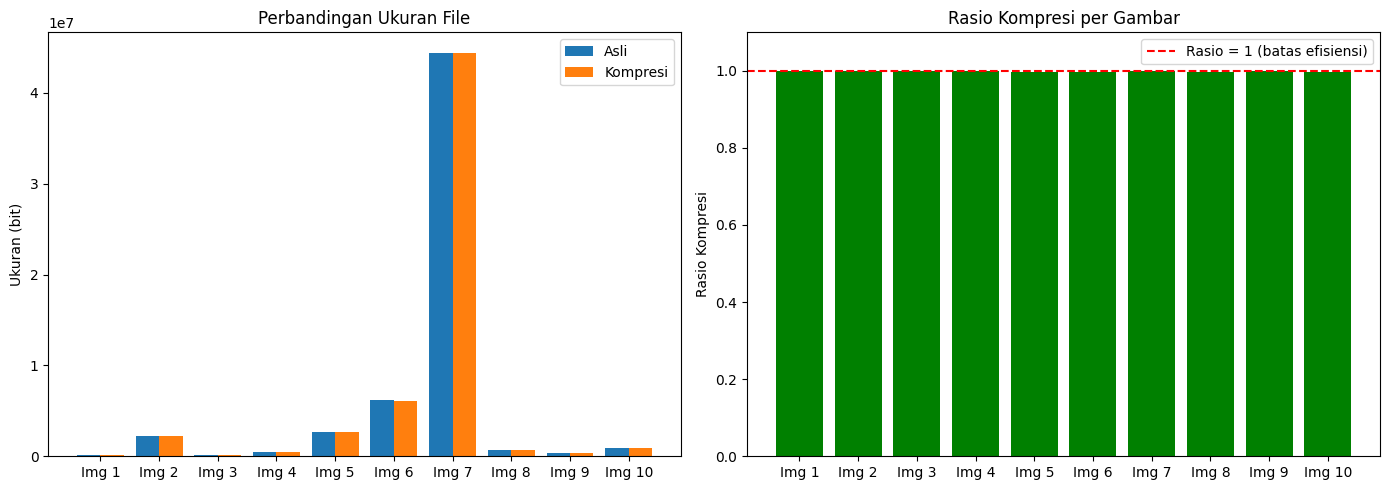

In [21]:
plt.figure(figsize=(14, 5))

# Grafik 1: Ukuran asli vs kompresi
plt.subplot(1, 2, 1)
x = range(len(labels))
plt.bar(x, original_sizes, width=0.4, label='Asli', align='center')
plt.bar([i + 0.4 for i in x], compressed_sizes, width=0.4, label='Kompresi', align='center')
plt.xticks([i + 0.2 for i in x], labels)
plt.ylabel("Ukuran (bit)")
plt.title("Perbandingan Ukuran File")
plt.legend()

# Grafik 2: Rasio Kompresi
plt.subplot(1, 2, 2)
plt.bar(labels, compression_ratios, color='green')
plt.axhline(y=1.0, color='red', linestyle='--', label='Rasio = 1 (batas efisiensi)')
plt.ylabel("Rasio Kompresi")
plt.title("Rasio Kompresi per Gambar")
plt.ylim(0, max(compression_ratios) + 0.1)
plt.legend()

plt.tight_layout()
plt.show()

🖼️ Gambar Asli:


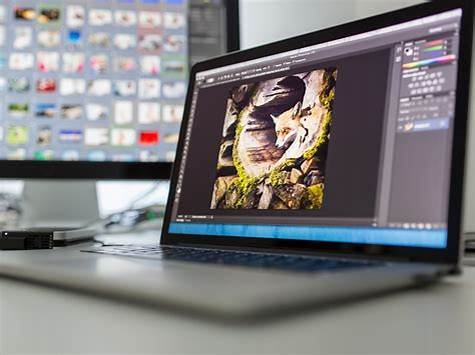

🖼️ Gambar Hasil Dekompresi:


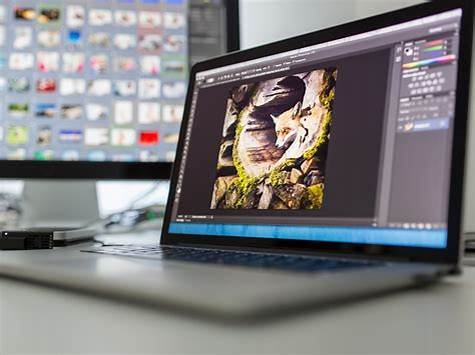

In [22]:
if image_files:
    original = os.path.join(folder_path, image_files[0])
    decompressed = os.path.join(folder_path, "decompressed_" + image_files[0])

    print("🖼️ Gambar Asli:")
    display(Image.open(original))

    print("🖼️ Gambar Hasil Dekompresi:")
    display(Image.open(decompressed))